<h1>Chapter 4 | Case Study A | <b>Management Quality and Firm Size: Describing Patterns of Association</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to reproduce the code in the original case studies repo, visualize the distribution of the data, group quantitative values using qualitative definitions, as well as ploting stacked bar charts to visualize the resulted qualitative binning. We will be using the <code>wms-management-survey</code> dataset.</p>
<h2>1. Read the data</h2>

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_case_studies/ch04-management_firm_size/data/clean/"
output = f"{dirname}da_case_studies/ch04-management_firm_size/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"

sys.path.append(func)
func

'c:\\Users\\Felipe\\python_work\\Projects\\bk_data_analysis\\da_case_studies/ch00-tech_prep/'

In [3]:
# import the prewritten helper functions
from py_helper_functions import *

In [4]:
# Load the dataset
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [5]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Our first step is to reproduce the book's sample selection. It analyzed a cross-section of Mexican firms from the 2013 wave of the survey. The author also excluded firms with fewer than 100 employees and more than 5000 employees.</p>

In [6]:
df = df.loc[
    lambda x: (x["country"] == "Mexico") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
    ]

In [7]:
df["emp_firm"].describe()

count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

<p>Perfect. We have a sample of 300 firms, with min and max sizes between the established values. We can now save our workfile so that we can work it later on.</p>

In [8]:
df.to_csv(f"{data_out}ch04-wms_workfile.csv", index=False)

<h2>2. Visualizing the distribution of management score</h2>
<p>Let's take a look at the distribution of the management score, which is a simple average of 18 score variables ranging from 1 to 5.</p>

In [9]:
df.loc[:, ["management", "emp_firm"]].describe()

,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


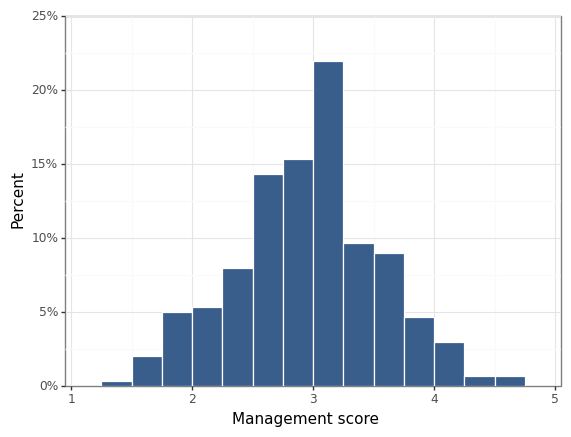

<ggplot: (172889723586)>

In [10]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

<p>Let's take a look at the histogram:</p>
<ul>
<li>The mean is <b>2.9</b>, while the median is also <b>2.9</b>.</li>
<li>The standard deviation is <b>0.6</b>.</li>
<li>We can tell that the mode is around <b>3.1</b>.</li>
</ul>
<h2>3. Visualizing the distribution of employment</h2>
<p>Let's take a look at the summary statistic of Mexican firms by their respective size, which is measured by the number of employees employed by the firm.</p>

In [11]:
df.loc[:, "emp_firm"].describe()

count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

<p>Observations:</p>
<ul>
<li>The mean is <b>761</b>.</li>
<li>The median is <b>353</b>.</li>
<li>Because the mean is far higher than the median, we can expect some significant <b>skwewness</b> represented by a long right tail.</li>
<li>The standard deviation is <b>977</b>, which supports the argument that we are dealing with a skewed distribution.</li>
</ul>
<p>Let's first plot a histogram using a normal scale.</p>

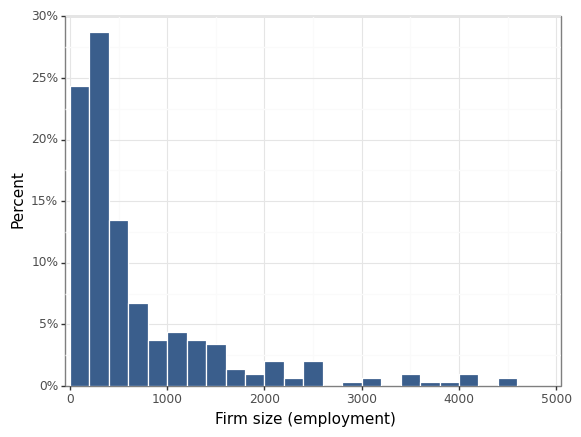

<ggplot: (172890326848)>

In [12]:
ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
) + labs(x="Firm size (employment)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.5, by=0.05),
    labels=percent_format(),
) + theme_bw()

<p>As we can see, most Mexican firms have less than 1000 employees. There are a few extreme values, with two firms with around 4500 employees and three with 4000 employees.</p>
<p>To make this distrbution more symmetric, we can plot a histogram formatted by the <b>lognormal distribution</b>.</p>

In [13]:
df["lnemp_firm"] = np.log(df["emp_firm"])
df["lnemp_firm"].describe()

count    300.000000
mean       6.081850
std        0.992700
min        4.605170
25%        5.298317
50%        5.866432
75%        6.802395
max        8.517193
Name: lnemp_firm, dtype: float64

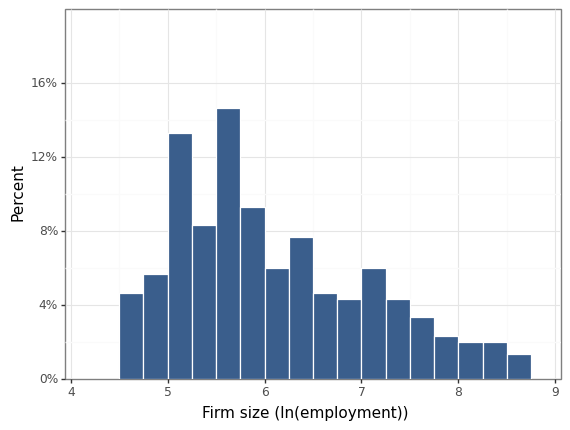

<ggplot: (172890631012)>

In [14]:
ggplot(df, aes(x="lnemp_firm"))  + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0], 
    color="white", 
    binwidth=0.25, 
    boundary=0, 
    closed="left"
) + labs(x="Firm size (ln(employment))", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9) 
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.2),
    breaks=seq(0, 0.2, by=0.04),
    labels=percent_format(),
) + theme_bw()

<p>We notice that the distribution is not as skewed as before, yet it still presents a longer tail to the right. The distribution, nonetheless, is much more symmetrical. In conclusion, the distribution of employment is skewed; while closer to lognormal than normal, the latter is still not the best approach.</p>
<h2>4. Conditional probabilities | Binning firm size and visualize the quality of specific management practices accordingly</h2>
<p>As a reminder, <b>conditional probability</b> of an event means the probability of an event if another event (the conditioning event) happens. Because both the management score and employment are quantitative variables with many values, they are not adequate for an investigation conditional probabilities.</p>
<p>To overcome this issue, we will create a <b>qualitative</b> variable by creating three bins of employment: <b>small, medium, and large</b>. Let's follow the book's example and bind the bins by three intervals: 100-199, 200-999, and 1000+.


In [15]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, pd.np.nan)
df["emp3bins"] = np.where((df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"])
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [16]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,lnemp_firm,emp3bins
10859,7778,2013,mx,Mexico,36.0,3.333333,3.5,3.6,2.8,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.521461,2.0
10861,7780,2013,mx,Mexico,37.0,3.500000,2.5,4.0,3.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.411833,3.0
10862,7781,2013,mx,Mexico,30.0,3.888889,4.0,4.8,4.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.669881,2.0
10865,7783,2013,mx,Mexico,22.0,1.833333,1.0,2.4,1.8,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857933,2.0
10866,7784,2013,mx,Mexico,20.0,2.222222,2.5,2.8,1.8,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,2.0


In [17]:
df["emp3bins"].describe()

count    300.000000
mean       2.000000
std        0.693978
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

<h3>4.1 Plotting stacked charts - Describing patterns of association</h3>
<p>We will use stacked charts to visualize conditional probabilities. Because we have 15 conditional probabilities for each management score (that is, the probability of each of the 5 values of y by each of the three values of x), a stacked bar chart will be of great assistance. Let's create the DataFrames for our job.</p>
<h4>4.1.1 Stacked bar chart | Figure 4.3 (a) Lean management</h4>


In [18]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1["emp3bins"] == 1, "Percent"] = round(df1.loc[df1["emp3bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["emp3bins"] == 2, "Percent"] = round(df1.loc[df1["emp3bins"] == 2, "Count"]/group_counts[2],5)
df1.loc[df1["emp3bins"] == 3, "Percent"] = round(df1.loc[df1["emp3bins"] == 3, "Count"]/group_counts[3],5)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)

In [19]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,14,0.19444
1,1.0,2.0,27,0.37500
2,1.0,3.0,23,0.31944
3,1.0,4.0,8,0.11111
4,2.0,1.0,13,0.08333
5,2.0,2.0,45,0.28846
6,2.0,3.0,56,0.35897
7,2.0,4.0,34,0.21795
8,2.0,5.0,8,0.05128
9,3.0,1.0,5,0.06944


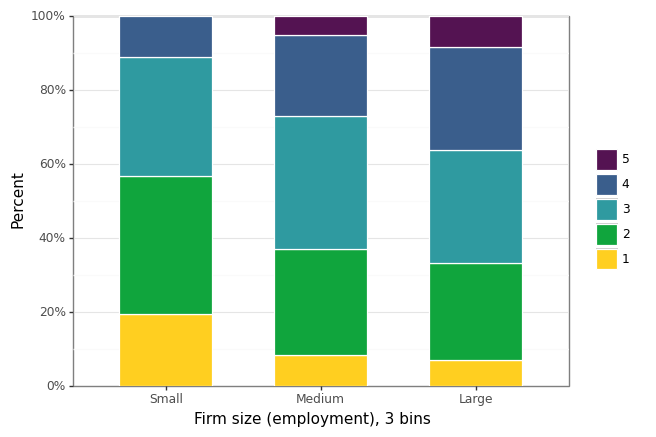

<ggplot: (172889802485)>

In [20]:
ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

<p>Let's plot the second stacked chart before jumping into any conclusions.</p>
<h4>4.1.2 Stacked bar chart | Figure 4.3 (b) Performance tracking</h4>


In [21]:
df2 = pd.DataFrame(
    df.loc[:, ["emp3bins", "perf2"]].groupby(["emp3bins", "perf2"]).agg("size")
).reset_index()

df2.columns = ["emp3bins", "perf2", "Count"]

group_counts = df2.groupby("emp3bins").agg("sum")["Count"]

df2.loc[df2["emp3bins"] == 1, "Percent"] = round(df2.loc[df2["emp3bins"] == 1, "Count"]/group_counts[1],5)
df2.loc[df2["emp3bins"] == 2, "Percent"] = round(df2.loc[df2["emp3bins"] == 2, "Count"]/group_counts[2],5)
df2.loc[df2["emp3bins"] == 3, "Percent"] = round(df2.loc[df2["emp3bins"] == 3, "Count"]/group_counts[3],5)

df2 = df2.assign(
    perf2=pd.Categorical(
        df2["perf2"], categories=sorted(set(df["perf2"]), reverse=True)
    )
)

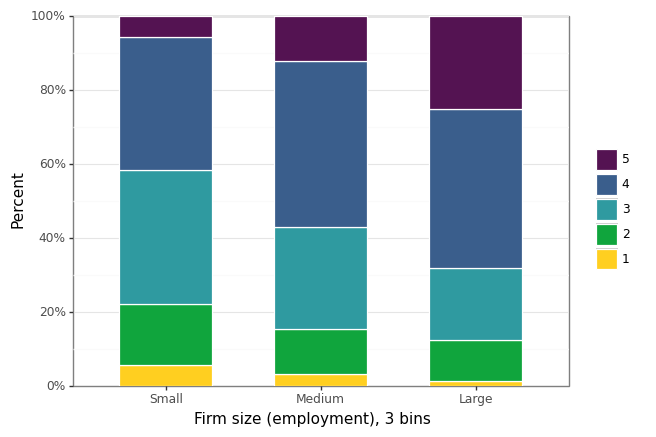

<ggplot: (172889849733)>

In [22]:
ggplot(df2, aes(x="emp3bins", y="Percent", fill="perf2")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [23]:
df1, df2

(    emp3bins lean1  Count  Percent
 0        1.0   1.0     14  0.19444
 1        1.0   2.0     27  0.37500
 2        1.0   3.0     23  0.31944
 3        1.0   4.0      8  0.11111
 4        2.0   1.0     13  0.08333
 5        2.0   2.0     45  0.28846
 6        2.0   3.0     56  0.35897
 7        2.0   4.0     34  0.21795
 8        2.0   5.0      8  0.05128
 9        3.0   1.0      5  0.06944
 10       3.0   2.0     19  0.26389
 11       3.0   3.0     22  0.30556
 12       3.0   4.0     20  0.27778
 13       3.0   5.0      6  0.08333,
     emp3bins perf2  Count  Percent
 0        1.0   1.0      4  0.05556
 1        1.0   2.0     12  0.16667
 2        1.0   3.0     26  0.36111
 3        1.0   4.0     26  0.36111
 4        1.0   5.0      4  0.05556
 5        2.0   1.0      5  0.03205
 6        2.0   2.0     19  0.12179
 7        2.0   3.0     43  0.27564
 8        2.0   4.0     70  0.44872
 9        2.0   5.0     19  0.12179
 10       3.0   1.0      1  0.01389
 11       3.0   2.0      8 

<p>As we can see, for both performance scores, the figures display the same pattern association between the quality of management and firm size. Small firms tend to have low scores and a lower probability of displaying high scores than medium-sized firms, which are more likely to have low scores and less likely to have high scores than large firms. When it comes to lean management, scores 4 and 5 take up 11% of small firms (only score 4, as there was no score 5 registered for this firm size). Medium-sized firms registered a percentage of 27pp, while large firms showed an even higher proportion: 36pp. For performance tracking, the corresponding percentages are 40%, 57%, and 68%. These results suggest that <b>larger firms</b> are more likely to be better managed.</p>
<h3>4.2 Ploting bin scatters</h3>
<h4>4.2.1 Three bins</h4>
<p>We can now discuss conditional mean and joint distribution. Remember that <b>joint distribution</b> of two variables is the frequency of each value combination of the two variables. First, let's use the three bins that we had created. We can group them by the 3 bins and the firm sizes. We can get aggregate measures of min, max, average, median, standard deviation, and frequency of each bin category. Then, we will replace the bin numbers by a point corresponding to the midpoint in the employment bin (for instance, 150 for the 100-199 bin, 600 for the 200-999 bin, and so on).</p>

In [24]:
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
1.0         100.0   197.0   145.597222   150.0    26.397108   72
2.0         200.0   994.0   413.153846   353.0   190.397552  156
3.0        1000.0  5000.0  2130.652778  1650.0  1178.115578   72

In [25]:
# Recode employee bins 
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)
df["emp3bins"]

10859     600.0
10861    3000.0
10862     600.0
10865     600.0
10866     600.0
          ...  
11375     600.0
11376     600.0
11378     600.0
11379     600.0
11381    3000.0
Name: emp3bins, Length: 300, dtype: float64

In [26]:
# Summary
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
150.0       100.0   197.0   145.597222   150.0    26.397108   72
600.0       200.0   994.0   413.153846   353.0   190.397552  156
3000.0     1000.0  5000.0  2130.652778  1650.0  1178.115578   72

<p>We can now get the mean management scores for each bin by aggregating the data using the 3 bins and visualize the result.</p>

In [27]:
# Generate variables by mean
df1 = df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
df1

,emp3bins,management_emp3bins
0,150.0,2.679784
1,600.0,2.943732
2,3000.0,3.185957


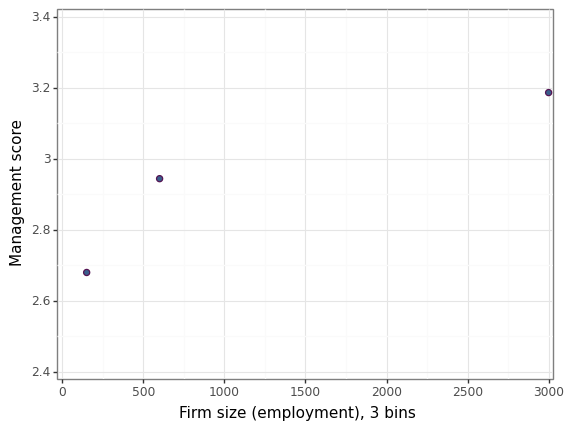

<ggplot: (172889763087)>

In [28]:
ggplot(df1, aes(x="emp3bins", y="management_emp3bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.4, 3.4), breaks=seq(2.4, 3.5, by=0.2)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3000), breaks=seq(0, 3001, by=500)
) + labs(
    x="Firm size (employment), 3 bins", y="Management score"
) + theme_bw()

<p>As we can observe, there is a clear <b>positive</b> association. Larger firms, on average, are better managed. We got a mean score of 2.68 for small firms, 2.94 for medium-sized firms, and 3.19 for large firms. Now, would this association hold when using a bin scatter of 10 bins? Let's find out.</p>
<h4>4.2.2 Ten-bin scatter</h4>

In [29]:
df["emp10bins"] = pd.qcut(df["emp_firm"],10)

<p>We just applied an interesting function, <code>qcut()</code>, that discretizes variables into equal-sized buckets. I had no idea that such a function existed, so helpful!</p>

In [30]:
# Summary
df_summary = df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)
df_summary

emp_firm                                              
                      min     max         mean  median         std size
emp10bins                                                              
(99.999, 144.5]     100.0   140.0   118.566667   118.0   11.595729   30
(144.5, 180.0]      145.0   180.0   163.625000   160.0   12.947007   40
(180.0, 229.4]      184.0   228.0   204.000000   200.0   10.223811   20
(229.4, 278.0]      230.0   275.0   250.533333   250.0   11.607766   30
(278.0, 353.0]      280.0   350.0   310.266667   300.0   23.090427   30
(353.0, 500.0]      356.0   500.0   432.222222   405.0   50.747617   36
(500.0, 670.0]      520.0   670.0   583.240000   600.0   49.321463   25
(670.0, 1110.0]     700.0  1100.0   905.793103   900.0  137.250912   29
(1110.0, 2000.0]   1150.0  2000.0  1515.294118  1500.0  289.735881   34
(2000.0, 5000.0]   2100.0  5000.0  3438.730769  3500.0  982.115006   26

<p>We can now get the midpoint of each bin by replacing the interval with the mean of each interval.</p>

In [31]:
# Recode
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})

In [32]:
df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                              
                        min     max         mean  median         std size
emp10bins                                                                
118.56666666666666    100.0   140.0   118.566667   118.0   11.595729   30
163.625               145.0   180.0   163.625000   160.0   12.947007   40
204.0                 184.0   228.0   204.000000   200.0   10.223811   20
250.53333333333333    230.0   275.0   250.533333   250.0   11.607766   30
310.26666666666665    280.0   350.0   310.266667   300.0   23.090427   30
432.22222222222223    356.0   500.0   432.222222   405.0   50.747617   36
583.24                520.0   670.0   583.240000   600.0   49.321463   25
905.7931034482758     700.0  1100.0   905.793103   900.0  137.250912   29
1515.2941176470588   1150.0  2000.0  1515.294118  1500.0  289.735881   34
3438.730769230769    2100.0  5000.0  3438.730769  3500.0  982.115006   26

In [33]:
# Return variables by mean
df1 = df.groupby("emp10bins").agg(management_emp10bins=("management", "mean")).reset_index()
df1

,emp10bins,management_emp10bins
0,118.566667,2.588889
1,163.625000,2.736111
2,204.000000,2.727778
3,250.533333,2.968519
4,310.266667,2.953704
5,432.222222,2.956790
6,583.240000,3.000000
7,905.793103,2.994253
8,1515.294118,3.096405
9,3438.730769,3.410256


In [34]:
df1 = df1[["emp10bins", "management_emp10bins"]].astype("float64")

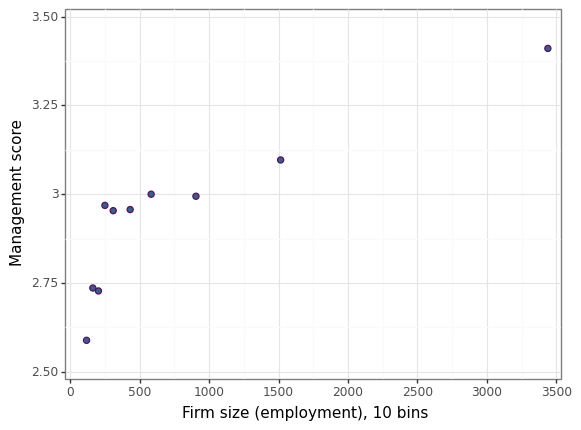

<ggplot: (172889890534)>

In [35]:
ggplot(df1, aes(x="emp10bins", y="management_emp10bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=seq(2.5, 3.6, by=0.25)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3500), breaks=seq(0, 3501, by=500)
) + labs(
    x="Firm size (employment), 10 bins", y="Management score"
) + theme_bw()

<p>This bin scatter shows a <b>less straight linear relationship</b>. The average values for each bin did not change significantly from bin 4 to 8. Still, we can observe a sizeable difference in the mean management quality between smaller and larger firms. We can also observe, moreover, that the bin scatters reflect the high degree of <b>skewness</b> that we had observed in the histogram.</p>
<p>While larger firms tend to display better mean management scores, we cannot make this assumption across all large firms, right? After all, we are discussing averages. To measure the distribution of the management score around its conditional mean values, we look at the <b>scatterplot</b>.

<h3>4.3 Scatterplot</h3>

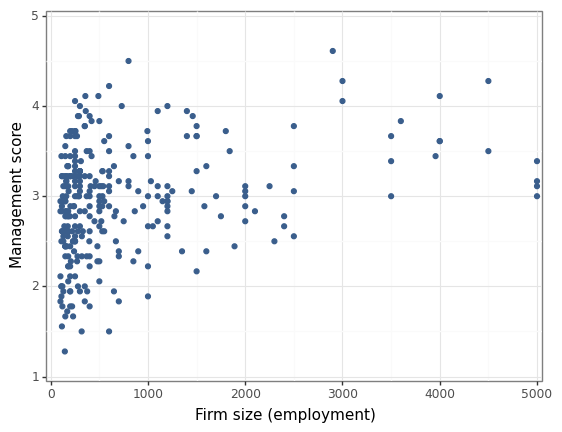

<ggplot: (172889947392)>

In [36]:
ggplot(df, aes(x="emp_firm", y="management")) + geom_point(
    size=1.5, color=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + labs(
    x="Firm size (employment)", y="Management score"
) + theme_bw()

<p>Because the distribution of our data is highly skewed, we cannot see a clear pattern. We can apply the natural log of the employment on the x axis, which translates into a stretched difference between firms at lower levels of employment. Let's observe the results below:</p>

In [37]:
df["lnemp"] = np.log(df["emp_firm"])

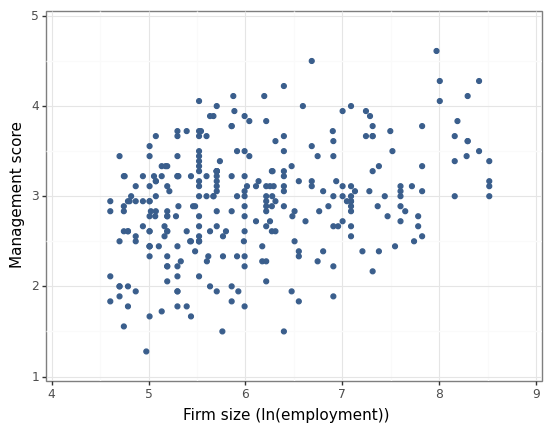

<ggplot: (172890174194)>

In [38]:
ggplot(df, aes(x="lnemp", y="management")) + geom_point(
    size=1.5, color=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9), breaks=seq(4, 10, by=1)
) + labs(
    x="Firm size (ln(employment))", y="Management score"
) + theme_bw()

<p>With our observations spread out, we can observe a positive correlation between management score and firm size. However, we also see a lot of variation of the management score at every level of employment - there is a lot of spread of the management score among firms with the same size.</p>
<p>To get more insight into whether - and to what extent - the spread or skewness of the managmeent score distribution differ at different levels of employments, we can produce <b>box plots</b> and <b>violin plots</b> of the management score for three employment bins.</p>

<h3>4.4 Box plots and violin plots to visualize the spread of the data</h3>

In [39]:
df = df.replace({"emp3bins":{
                    150: "Small",
                    600: "Medium",
                    3000: "Large",}
                    })

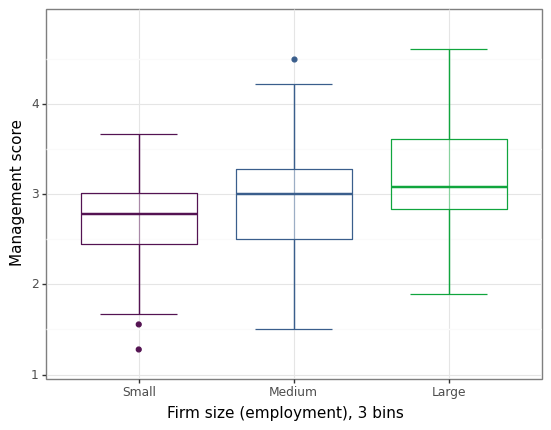

<ggplot: (172890271603)>

In [40]:
# Bot plots
ggplot(df, aes(x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
               y="management",
               ),
    ) + stat_boxplot(
        aes(group="emp3bins"),
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0], color[2]),
        size=0.5,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="emp3bins"),
        color=(color[2], color[0], color[1]),
        size=0.5,
        alpha=0.5,
        na_rm=True,
    ) + labs(
        x="Firm size (employment), 3 bins",
        y="Management score"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 1)
    ) + theme_bw()

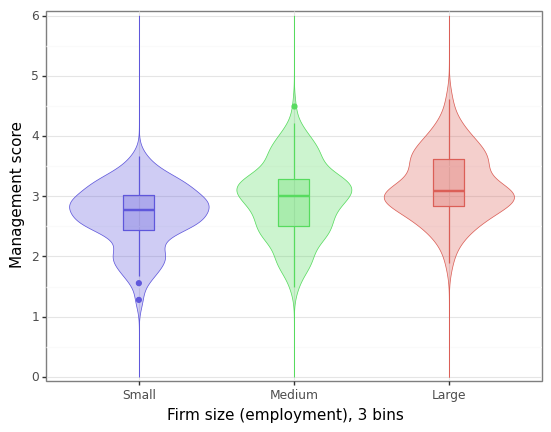

<ggplot: (172890260354)>

In [41]:
ggplot(df, 
       aes(x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
           y="management",
           color="emp3bins",
           fill="emp3bins",    
               ),
    ) + geom_violin(
        aes(group="emp3bins"),
        alpha=0.3,
        size=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="emp3bins"),
        size=0.5,
        alpha=0.3,
        width=0.2,
        na_rm=True,
    ) + labs(
        x="Firm size (employment), 3 bins",
        y="Management score"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 7, 1)
    ) + guides(
        fill=False, color=False
    ) + theme_bw()

<p>As we can observe, the median management score is higher in larger firms, which reflects the same positive association as the bin scatters and the scatterplot. Upper and lower quartiles, as well as minimum and maximum statistics, support this trend. We can also see that the management scores for smaller firms are somewhat more concentrated. This means that we can expect smaller yet more similar scores for smaller firms, while for larger firms, scores can differ more from each other.</p>
<h3>4.5 Correlation and latent variable</h3>
<p>A <b>latent variable</b> is an abstract variable, which is not a part of the dataset by itself, as it cannot be directly measured. Instead, we use <b>proxy variables</b>, which indeed replace them as a way to measure its original variables.</p>
<p>

In [48]:
# get the covariance between firm size and management score
covariance = round(df["emp_firm"].cov(df["management"]),2)

In [54]:
df_results = pd.DataFrame(
    data={"covariance": covariance,
     "firm_size_std": df["emp_firm"].std(),
     "management_score_std": df["management"].std(),
     "corr_coef": df["emp_firm"].corr(df["management"])},
     index=[0]
)
df_results

,covariance,firm_size_std,management_score_std,corr_coef
0,177.35,977.035685,0.601059,0.301995


<p>As we can see, the covariance between firm size and the management score is <b>177</b>. The standard deviation for both variables is <b>977</b> and <b>0.60</b>, respectivelly. The correlation coefficient is <b>0.30</b>. This outcome hints at a <b>positive</b> association, whereas firms with more employees tend to have higher management score. Such magnitude, however, is moderate, as other factors may impinge on management score in addition to the size of a company.</p>
<p>We can analyze the correlation coefficient in seven broad categories of industrial classification (in addition to one "other" category with the industry with very few firms, combined).

In [55]:
# Correlation by industry
df["industry_broad"] = pd.np.NaN
df.loc[df["sic"] <= 21, "industry_broad"] = "foods_drink_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad" 
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] <= 37), "industry_broad"] = "electronics"
df.loc[(df["sic"] == 37) , "industry_broad"] = "auto"
df.loc[(df["sic"] >= 38) , "industry_broad"] = "other"

In [56]:
df["industry_broad"].value_counts()

chemicals_etc                  69
materials_metals               50
textile_apparel_leather_etc    38
wood_furniture_paper           37
electronics                    36
foods_drink_tobacco            34
auto                           26
other                          10
Name: industry_broad, dtype: int64

In [107]:
# Check correlation
df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]

industry_broad                         
auto                         management    0.502322
chemicals_etc                management    0.053380
electronics                  management    0.282000
foods_drink_tobacco          management    0.052144
materials_metals             management    0.320921
other                        management    0.628398
textile_apparel_leather_etc  management    0.360877
wood_furniture_paper         management    0.294981
Name: emp_firm, dtype: float64

In [108]:
df.filter(["management", "industry_broad"]).loc[
    lambda x: ~x["industry_broad"].isnull()
].groupby("industry_broad").agg(
    Min=("management", min),
    Max=("management", max),
    SD=("management", np.std),
    Median=("management", "median"),
    n=("management", "size")
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,2.277778,4.277778,0.553367,3.194445,26
chemicals_etc,1.277778,4.111111,0.550176,3.000000,69
electronics,1.500000,4.500000,0.693034,3.111111,36
foods_drink_tobacco,1.888889,4.222222,0.525753,2.833333,34
materials_metals,1.555556,4.277778,0.564557,2.861111,50
other,1.777778,4.611111,0.844087,3.555556,10
textile_apparel_leather_etc,1.777778,4.000000,0.567371,2.777778,38
wood_furniture_paper,1.722222,3.555556,0.555556,2.833333,37


In [109]:
df.filter(["emp_firm", "industry_broad"]).loc[
    lambda x: ~x["industry_broad"].isnull()
].groupby("industry_broad").agg(
    Min=("emp_firm", min),
    Max=("emp_firm", max),
    SD=("emp_firm", np.std),
    Median=("emp_firm", "median"),
    n=("emp_firm", "size")
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,130.0,5000.0,1625.103843,500.0,26
chemicals_etc,116.0,2000.0,465.980775,356.0,69
electronics,115.0,5000.0,1126.786821,295.0,36
foods_drink_tobacco,120.0,2400.0,665.626102,471.0,34
materials_metals,100.0,5000.0,1151.436836,335.0,50
other,200.0,2900.0,867.247043,350.0,10
textile_apparel_leather_etc,110.0,4000.0,899.413044,350.0,38
wood_furniture_paper,100.0,3500.0,855.610261,300.0,37


In [110]:
# Check correlation
cor = (
    pd.DataFrame(
        df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]
    )
    .reset_index()
    .drop(["level_1"], axis=1)
)

In [111]:
cor.columns = ["industry_broad", "COR"]
cor = cor.set_index("industry_broad")

In [113]:
table_41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)

table_41["cor"] = cor["COR"]

In [116]:
table_41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electroncis",
    "Food, frinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table_41.round(2)

,Mean,Obs,cor
Auto,3.25,26,0.50
Chemicals,2.97,69,0.05
"Machinery, equipment, electroncis",3.15,36,0.28
"Food, frinks, tobacco",2.87,34,0.05
"Materials, metals",2.85,50,0.32
"Textile, apparel, leather",3.29,10,0.63
"Wood, furniture, paper",2.77,38,0.36
Other,2.72,37,0.29


In [117]:
last_row = (
    table_41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), cor=("cor", "mean"))
    .reset_index(drop=True)
)

last_row.index = ["All"]

In [118]:
table_41 = table_41.append(last_row)

In [119]:
table_41 = table_41.loc[:, ["cor", "Mean", "Obs"]].reset_index()
table_41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [120]:
table_41.round(2)

,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.50,3.25,26
1,Chemicals,0.05,2.97,69
2,"Machinery, equipment, electroncis",0.28,3.15,36
3,"Food, frinks, tobacco",0.05,2.87,34
4,"Materials, metals",0.32,2.85,50
5,"Textile, apparel, leather",0.63,3.29,10
6,"Wood, furniture, paper",0.36,2.77,38
7,Other,0.29,2.72,37
8,All,0.31,2.98,300


<p>The table shows that the correlation between management score and firm size is not equal across industries. For instance, the auto and the textile, apparel, leather industries present higher correlation coefficients, while Chemicals and Food, drinks, tobacco hold a very weak correlation between the two variables.</p>
<p>Regarding latent variables, it is important to notice that this study used one latent variable - the management score - as the y variable.</p>
<h2>5. Conclusion</h2>
<p>What did we learn about the association between firm size and management quality?</p>
<ul>
<li>Among Mexican manufacturing firms, larger firms tend to be better managed.</li>
<ul>
<li>Large firms have an average score of <b>3.19</b>, compared to <b>2.94</b> for medium-sized firms, and <b>2.68</b> for small ones.</li>
</ul>
<li>The correlation, even though positive, is <b>not very strong</b>. Maybe other issues also affect the quality of management besides firm size.</li>
<li>When disaggregating the results into smaller industry groups, we found that the strength of the management-size correlation differs in some industries from the rest, although we have not observed any pattern that would tell us why.</li>
<li>Management quality is not only better, on average, among larger firms, yet it is also more <b>spread</b> among larger firms.</li>
</ul>
<hr>
<h2><b>Extra</b> | Plotting box plots and violin plots</h2>
<p>The following code plots a descriptive version of a box plot and a violin plot, informing how to read each of them and take into consideration how each of them inform us about the distribution and spread of the data.</p>

In [121]:
df2 = df.filter(["emp3bins", "management"]).loc[lambda x: x["emp3bins"] == "Small"]

In [122]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df["management"], 0.75)

iqr = q3 - q1
ub = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df2.loc[df2["management"] >= q3 - 1.5 * iqr, "management"])

out_lb = min(df2["management"])
min = min(df["management"])
max = max(df["management"])

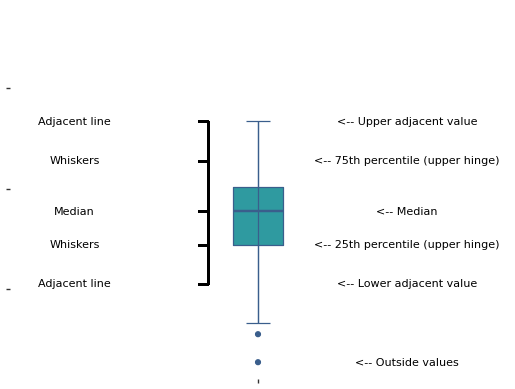

<ggplot: (166363965726)>

In [123]:
ggplot(df2, aes(x="emp3bins", y="management")) + geom_boxplot(
    color=color[0], fill=color[4], size=0.5, width=0.1, alpha=0.5, na_rm=True
) + stat_boxplot(
    geom="errorbar", width=0.05, color=color[0], size=0.5, na_rm=True
) + scale_y_continuous(
    limits=(min, max)
) + annotate(
    "text", x=1.3, y=ub, label="<-- Upper adjacent value",  size=8
) + annotate(
    "text", x=1.3, y=q3, label="<-- 75th percentile (upper hinge)",  size=8
) + annotate(
    "text", x=1.3, y=q2, label="<-- Median",  size=8
) + annotate(
    "text", x=1.3, y=q1, label="<-- 25th percentile (upper hinge)",  size=8
) + annotate(
    "text", x=1.3, y=lb, label="<-- Lower adjacent value",  size=8
) + annotate(
    "text", x=1.3, y=out_lb, label="<-- Outside values",  size=8
) + annotate(
    "text", x=0.63, y=ub, label="Adjacent line",  size=8
) + annotate(
    "text", x=0.63, y=q3, label="Whiskers",  size=8
) + annotate(
    "text", x=0.63, y=q2, label="Median",  size=8
) + annotate(
    "text", x=0.63, y=q1, label="Whiskers",  size=8
) + annotate(
    "text", x=0.63, y=lb, label="Adjacent line",  size=8
) + geom_segment(
    aes(x=0.9, y=lb, xend=0.9, yend=ub)
) + geom_segment(
    aes(x=0.88, y=lb, xend=0.9, yend=lb)
) + geom_segment(
    aes(x=0.88, y=q1, xend=0.9, yend=q1)
) + geom_segment(
    aes(x=0.88, y=q2, xend=0.9, yend=q2)
) + geom_segment(
    aes(x=0.88, y=q3, xend=0.9, yend=q3)
) + geom_segment(
    aes(x=0.88, y=ub, xend=0.9, yend=ub)
) + theme_bw() + theme(
    axis_title_x=element_blank(),
    axis_line_x=element_blank(),
    #axis_ticks_x=element_blank(),
    axis_text_x=element_blank(),
    axis_title_y=element_blank(),
    axis_line_y=element_blank(),
    #axis_ticks_y=element_blank(),
    axis_text_y=element_blank(),
    panel_grid=element_blank(),
    panel_border=element_blank(),
)

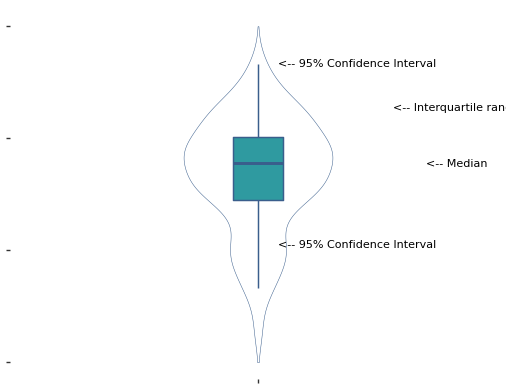

<ggplot: (166369276913)>

In [124]:
ggplot(df2, aes(x="emp3bins", y="management")) + geom_violin(
    size=0.2,
    width=0.3,
    trim=False,
    show_legend=False,
    na_rm=True,
    color=color[0],
    alpha=0.3,
) + geom_boxplot(
    color=color[0],
    fill=color[4],
    size=0.6,
    width=0.1,
    alpha=0.5,
    na_rm=True,
    outlier_shape="",
) + annotate(
    "text", x=1.2, y=ub, label="<-- 95% Confidence Interval",  size=8
) + annotate(
    "text", x=1.2, y=lb, label="<-- 95% Confidence Interval",  size=8
) + annotate(
    "text", x=1.4, y=q3, label="<-- Interquartile range",  size=8
) + annotate(
    "text", x=1.4, y=q2, label="<-- Median",  size=8
) +ylim(1,4
) + theme_bw() + theme(
    axis_title_x=element_blank(),
    axis_line_x=element_blank(),
    #axis_ticks_x=element_blank(),
    axis_text_x=element_blank(),
    axis_title_y=element_blank(),
    axis_line_y=element_blank(),
    #axis_ticks_y=element_blank(),
    axis_text_y=element_blank(),
    panel_grid=element_blank(),
    panel_border=element_blank(),
)
